In [1]:
from blimpy import Filterbank
import matplotlib.pyplot as plt
import numpy as np
from utils import *
%matplotlib notebook

In [36]:
path_to_fil = ("../data/noise_with_dc_2.rawspec.0001.fil")
path_to_fil_h = ("../data/noise_with_dc_2.rawspec.0002.fil")

In [37]:
obs = Filterbank(path_to_fil)

In [38]:
obs.info()

   b'machine_id' :                               20
 b'telescope_id' :                                6
      b'src_raj' :                      4:15:16.248
      b'src_dej' :                      -7:39:08.64
     b'az_start' :                              0.0
     b'za_start' :                              0.0
    b'data_type' :                                1
         b'fch1' :                    1501.46484375
         b'foff' :          -2.7939677238464355e-06
       b'nchans' :                         67108864
       b'nbeams' :                                1
        b'ibeam' :                               -1
        b'nbits' :                               32
   tstart (ISOT) :          2017-05-26T14:57:28.000
    tstart (MJD) :               57899.623240740744
        b'tsamp' :             18.253611007999982 s
         b'nifs' :                                1
  b'source_name' :                         b'SYNTH'
  b'rawdatafile' :      b'noise_with_dc_2.0000.raw'

Num ints in

In [40]:
plt.figure(figsize=(10,6))
obs.plot_waterfall()
title = plt.title(
    "Waterfall Plot")
plt.tight_layout()

<IPython.core.display.Javascript object>

IndexError: tuple index out of range

<IPython.core.display.Javascript object>


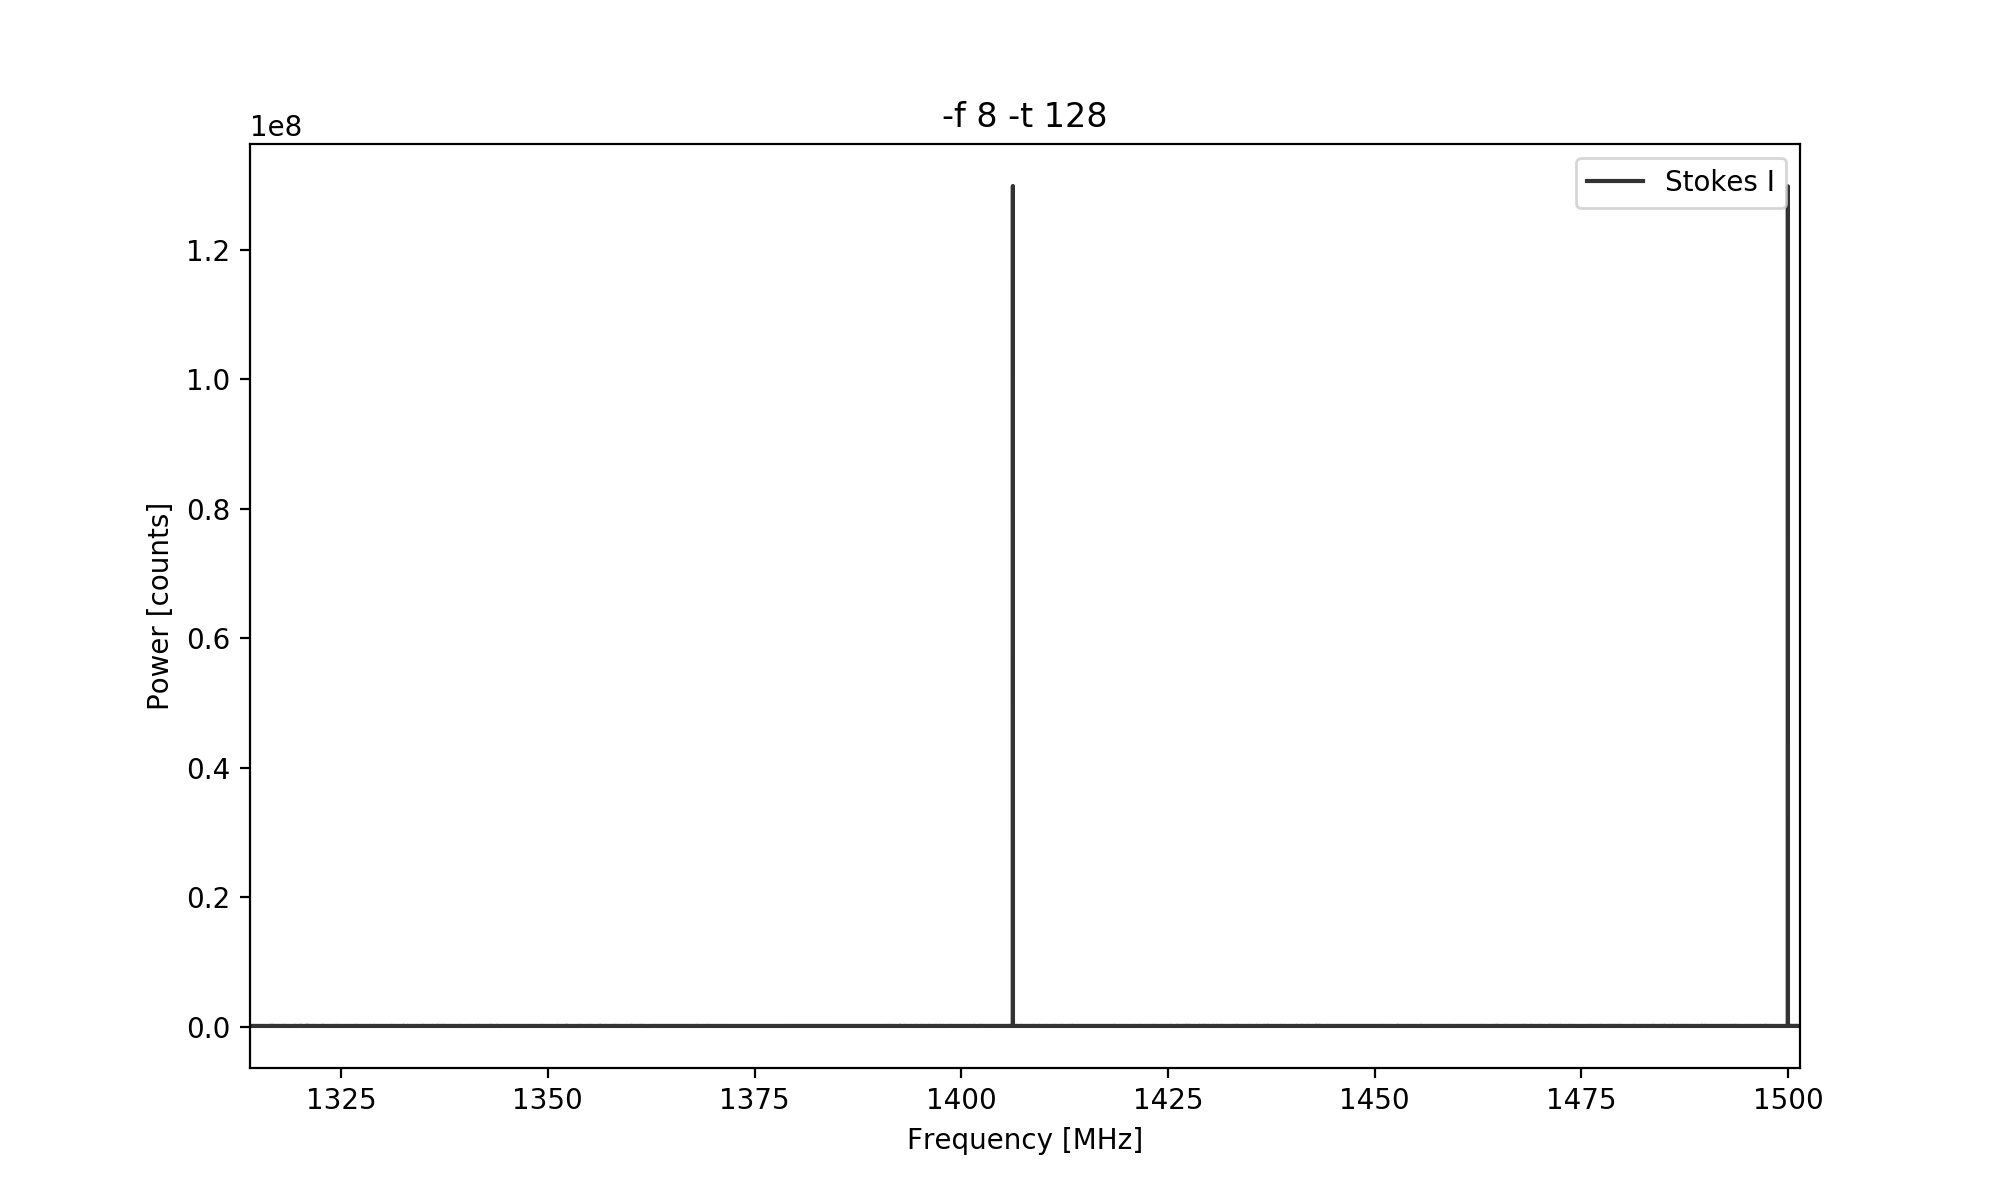

extracting integration 0...


Text(0.5, 1.0, '-f 8 -t 128')

In [28]:
plt.figure(figsize=(10,6))
obs.plot_spectrum(t=0)
plt.title("-f 8 -t 128")

<IPython.core.display.Javascript object>


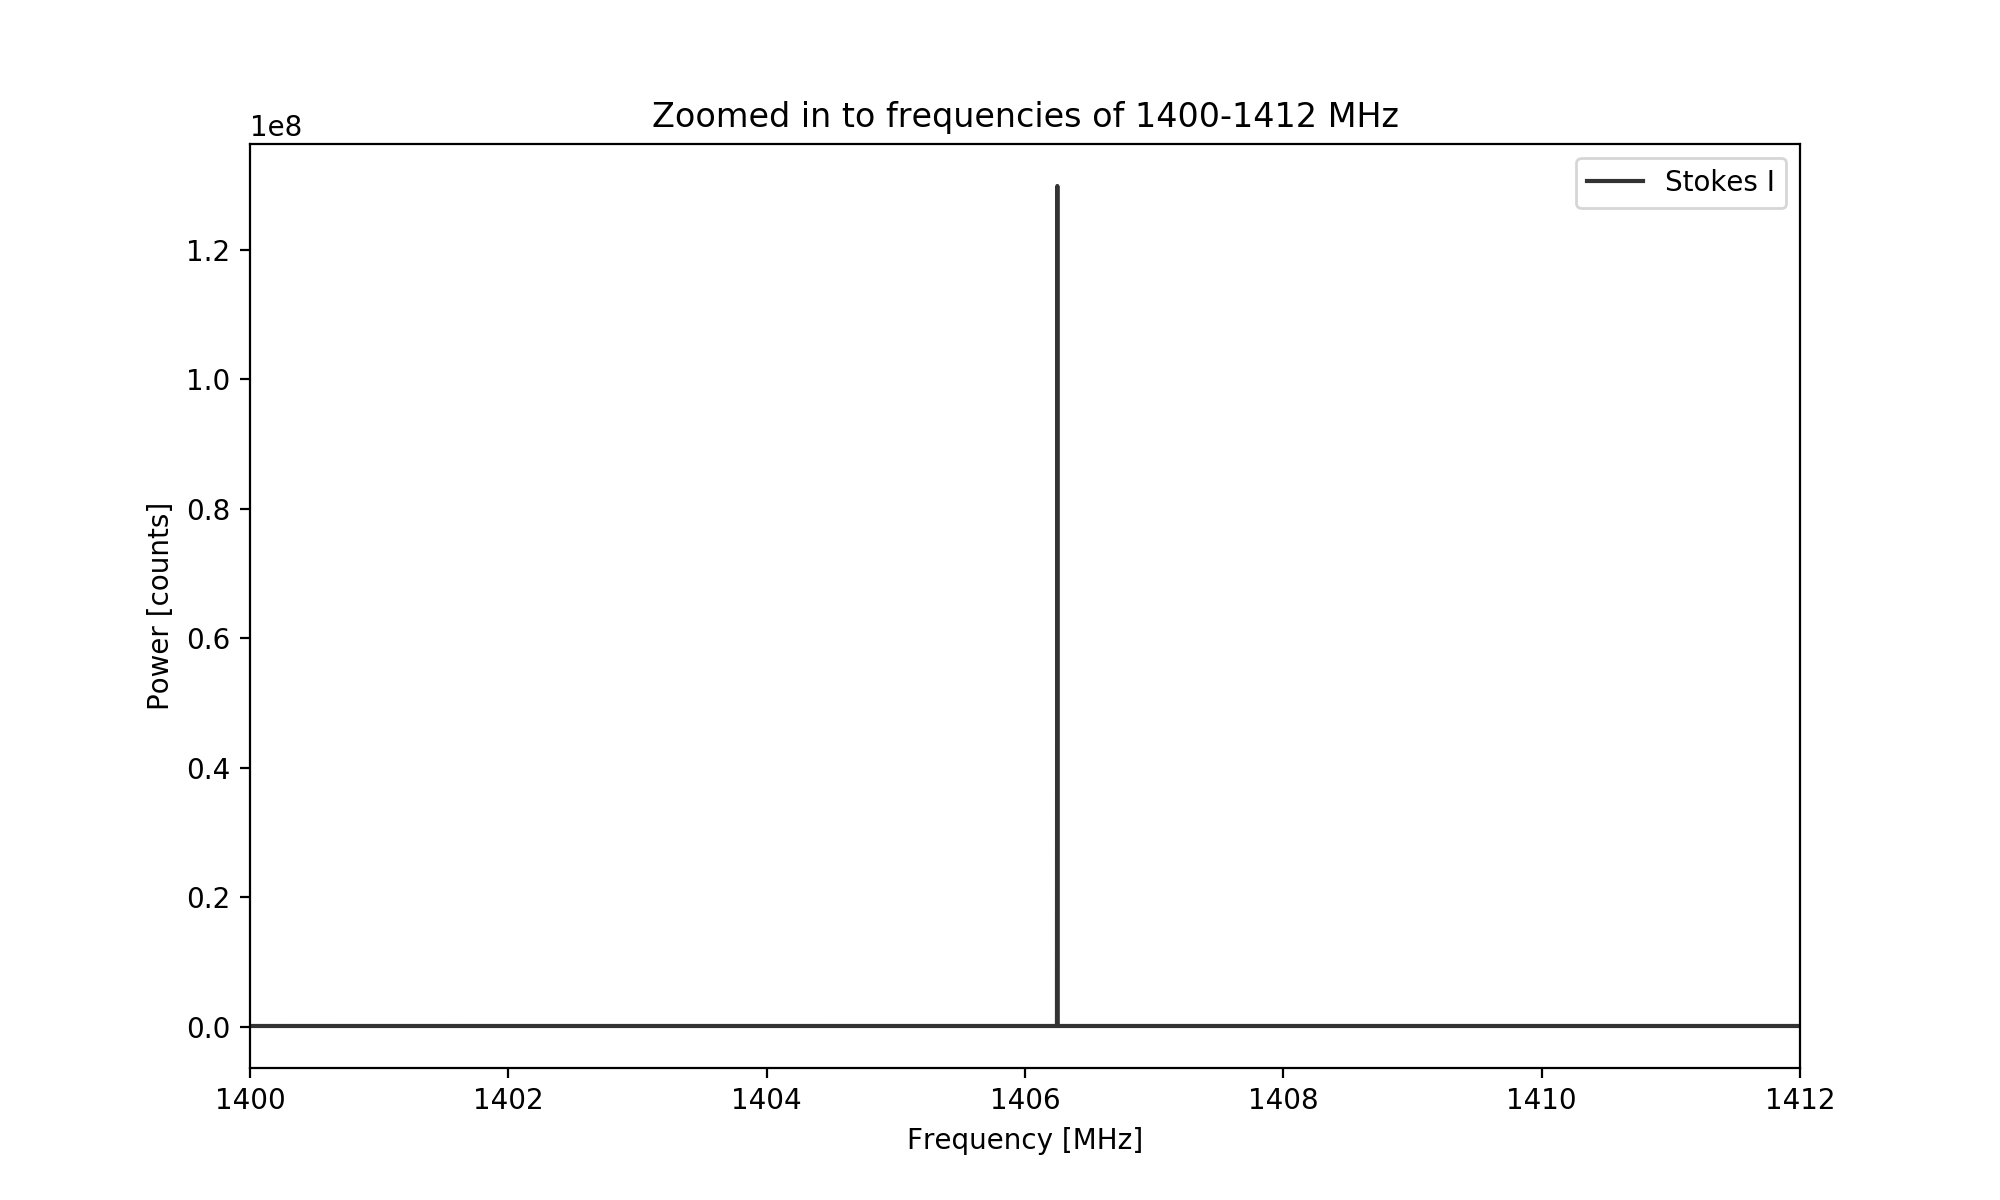

averaging along time axis...


In [29]:
zoom_start_f = 1400
zoom_stop_f = 1412
plt.figure(figsize=(10,6))
obs.plot_spectrum(t=b'all',f_start=zoom_start_f, f_stop=zoom_stop_f)
title = plt.title(
    "Zoomed in to frequencies of {0}-{1} MHz".format(zoom_start_f,zoom_stop_f))

In [ ]:
freqs, data = obs.grab_data()
data.shape

In [31]:
np.max(data)

389858080.0

In [27]:
(2000/127)**2*2*8*128

507905.0158100317

In [11]:
(19.6/127)**2

0.023817967635935272

In [12]:
obs_high_freq_res = Filterbank(path_to_fil_h)

In [13]:
obs_high_freq_res.info()

   b'machine_id' :                               20
 b'telescope_id' :                                6
      b'src_raj' :                      4:15:16.248
      b'src_dej' :                      -7:39:08.64
     b'az_start' :                              0.0
     b'za_start' :                              0.0
    b'data_type' :                                1
         b'fch1' :                    1501.46484375
         b'foff' :             -0.00286102294921875
       b'nchans' :                            65536
       b'nbeams' :                                1
        b'ibeam' :                               -1
        b'nbits' :                               32
   tstart (ISOT) :          2017-05-26T14:57:28.000
    tstart (MJD) :               57899.623240740744
        b'tsamp' :              1.073741823999999 s
         b'nifs' :                                1
  b'source_name' :                         b'SYNTH'
  b'rawdatafile' :      b'noise_with_dc_2.0000.raw'

Num ints in

In [14]:
w = 187.5/64
start_freq = 1314.3310546875

<IPython.core.display.Javascript object>


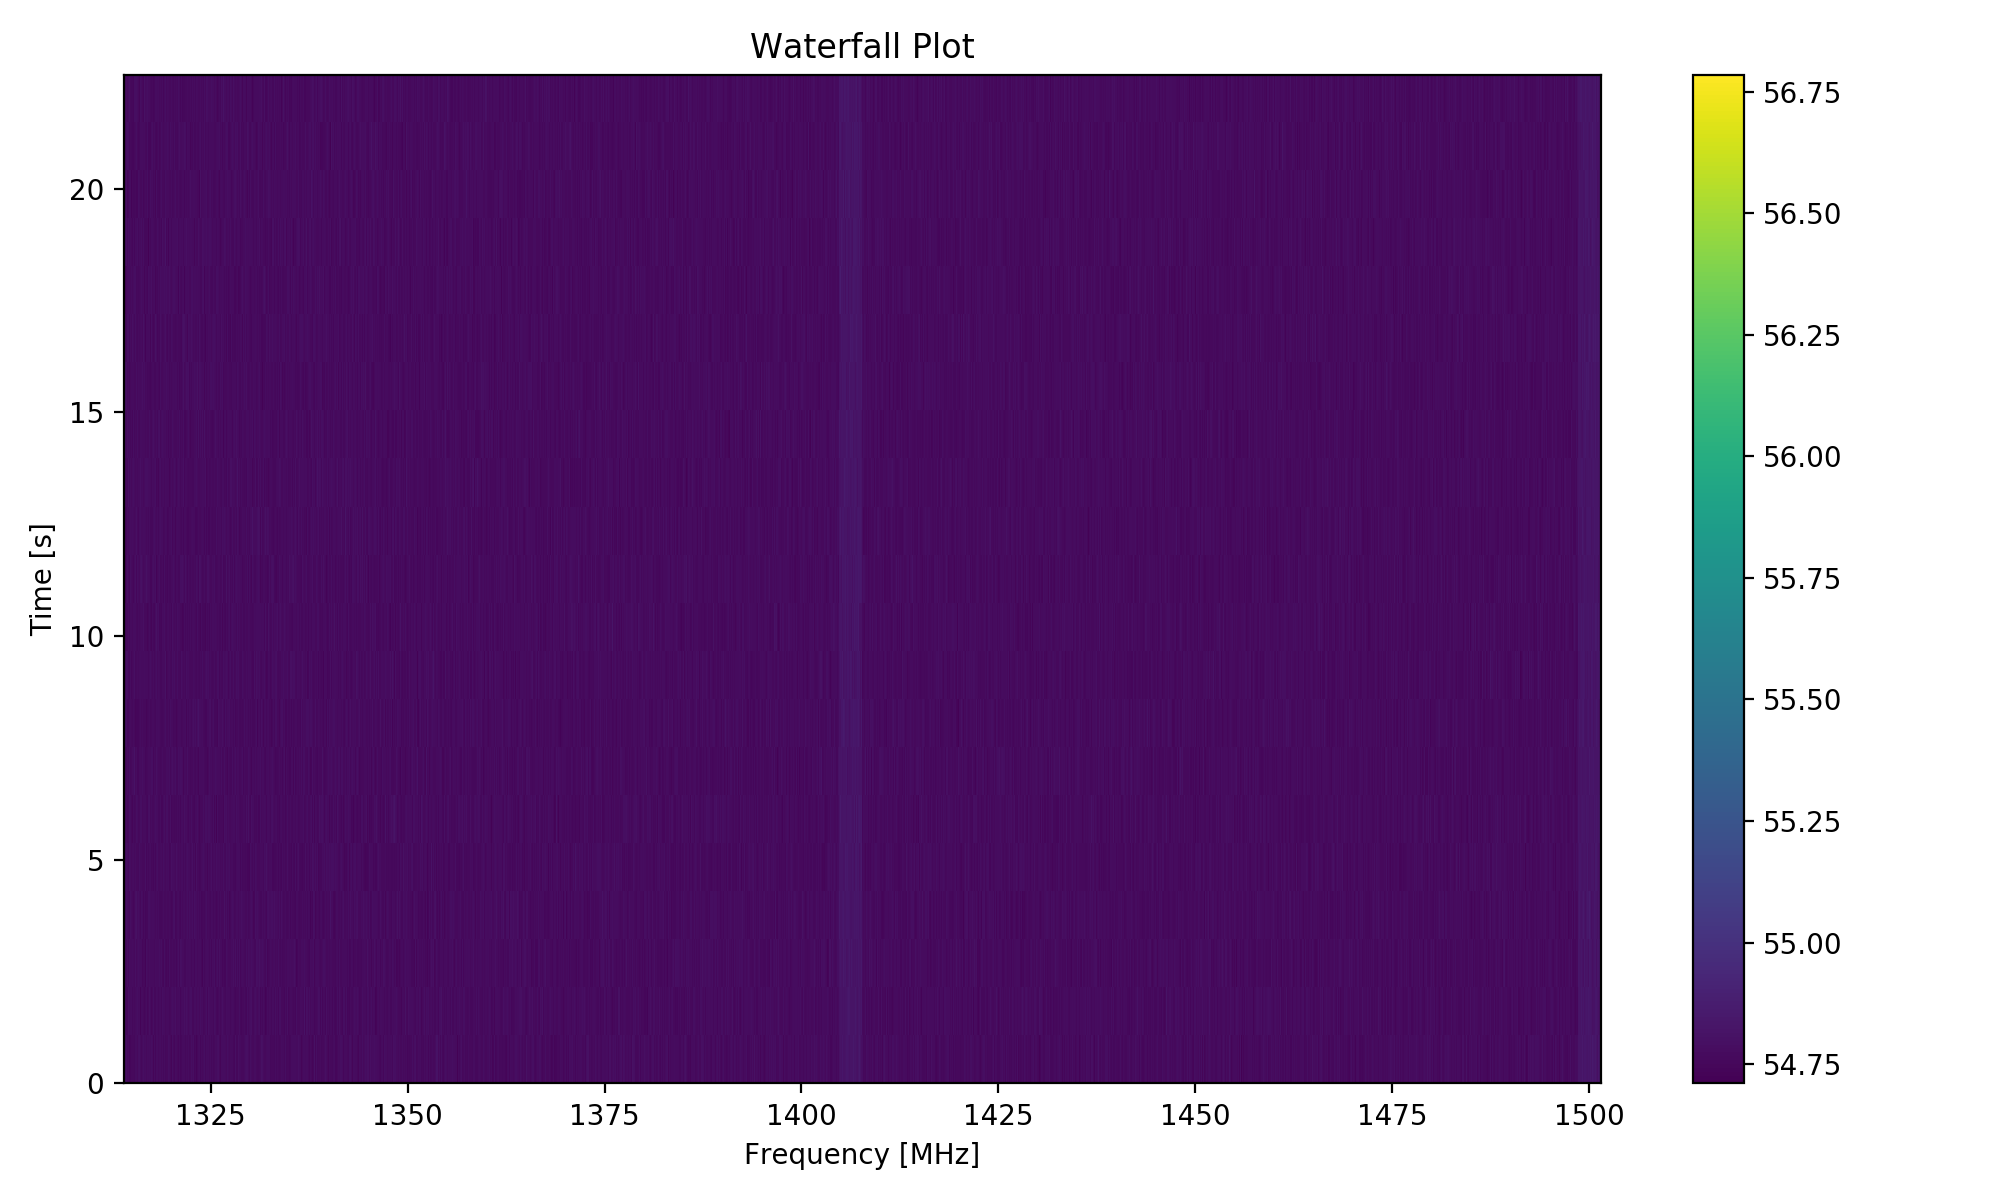

In [15]:
plt.figure(figsize=(10,6))
obs_high_freq_res.plot_waterfall()
title = plt.title(
    "Waterfall Plot")
plt.tight_layout()

In [ ]:
plt.figure(figsize=(10,6))
obs_high_freq_res.plot_spectrum(t=b'all')
plt.title("-f 1024 -t 3072")

In [16]:
freqs, data = obs_high_freq_res.grab_data()

In [17]:
x = np.arange(len(data))
data_sum = [np.mean(d) for d in data]
np.mean(data_sum)

311860.9

<IPython.core.display.Javascript object>


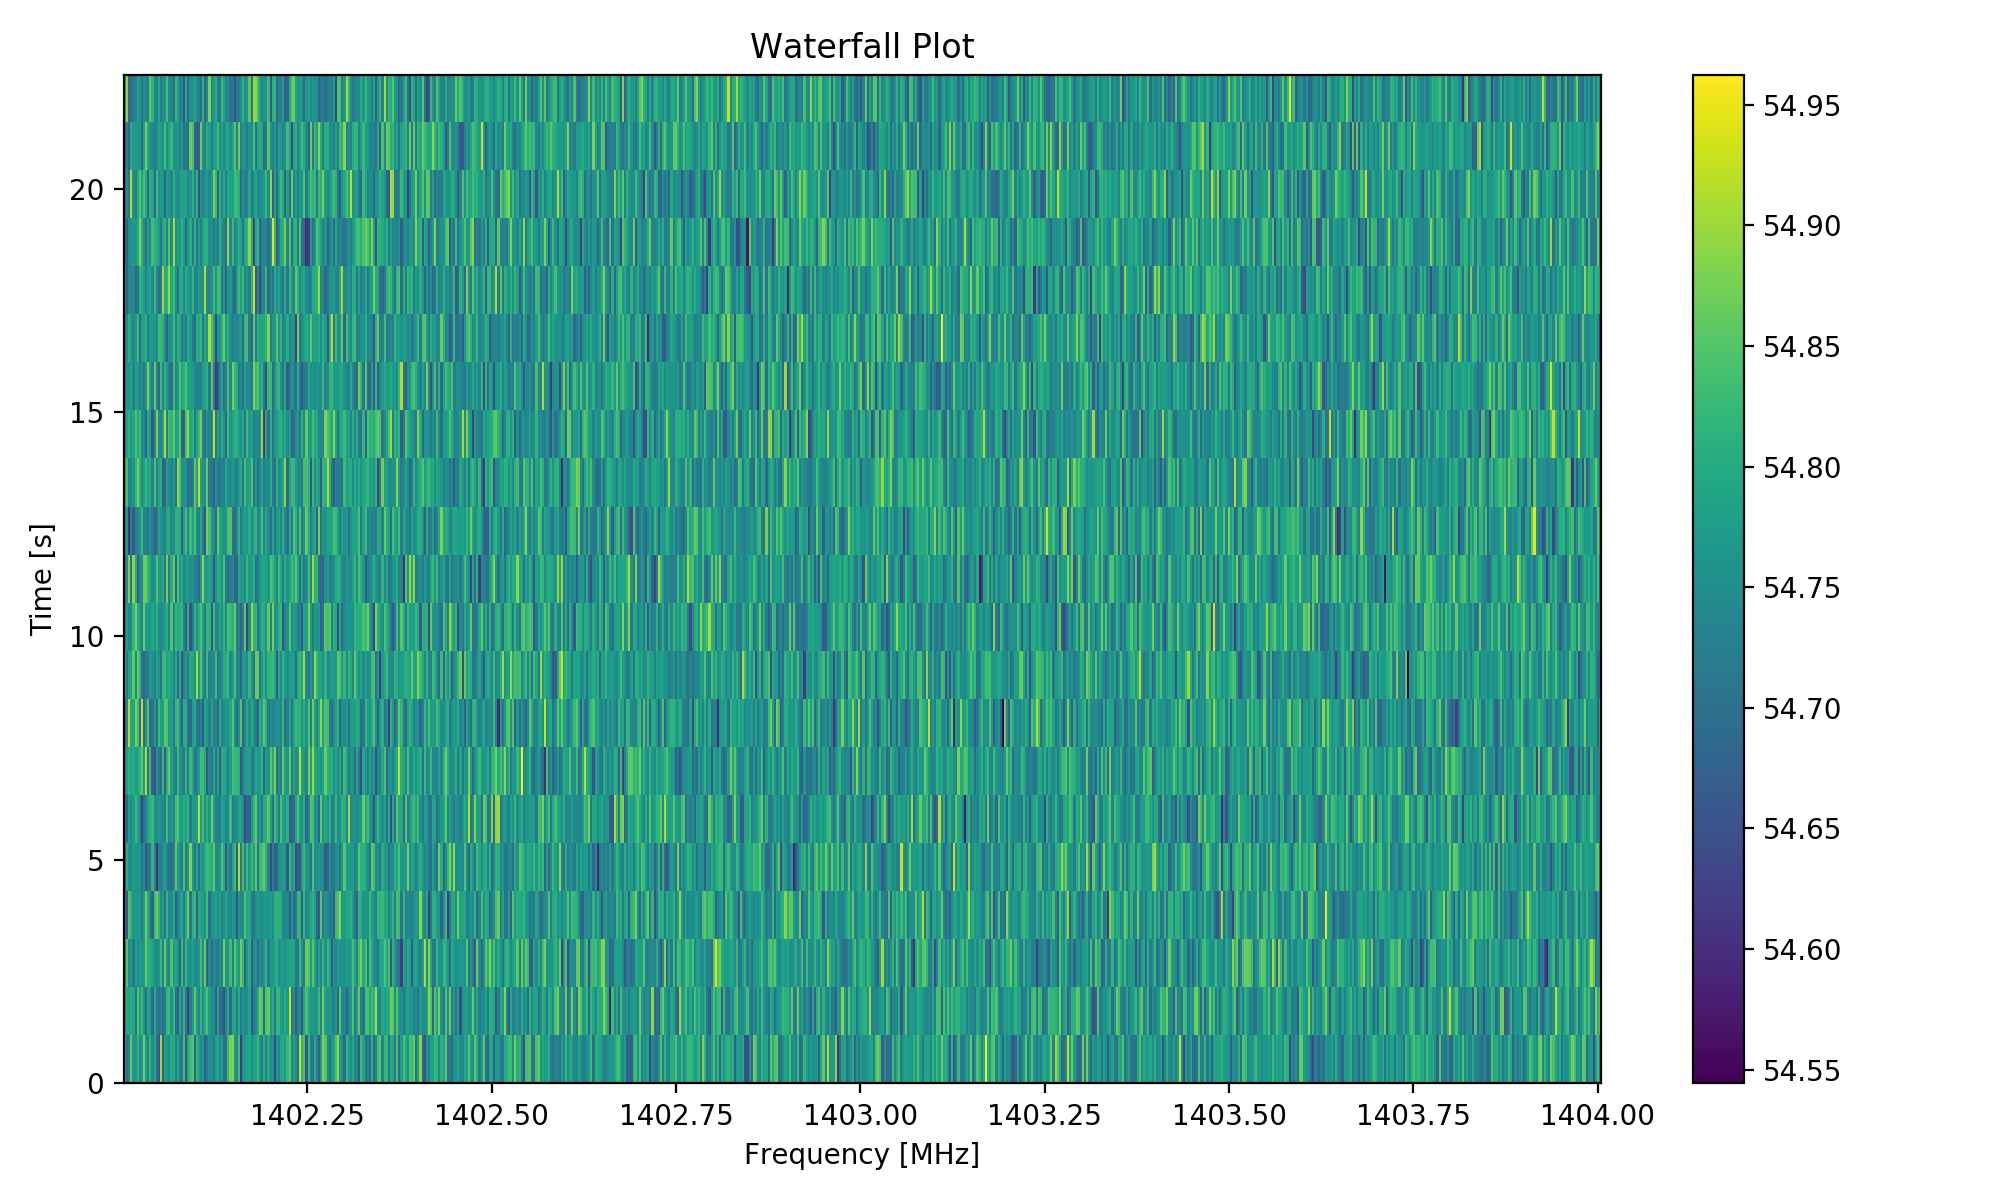

In [18]:
zoom_start_f = 1402
zoom_stop_f = 1404
plt.figure(figsize=(10,6))
obs_high_freq_res.plot_waterfall(f_start=zoom_start_f, f_stop=zoom_stop_f)
title = plt.title(
    "Waterfall Plot")
plt.tight_layout()

In [ ]:
plt.figure(figsize=(10,6))
obs_high_freq_res.plot_spectrum(t=0,f_start=zoom_start_f, f_stop=zoom_stop_f)
title = plt.title(
    "Zoomed in to frequencies of {0}-{1} MHz".format(zoom_start_f,zoom_stop_f))

<IPython.core.display.Javascript object>


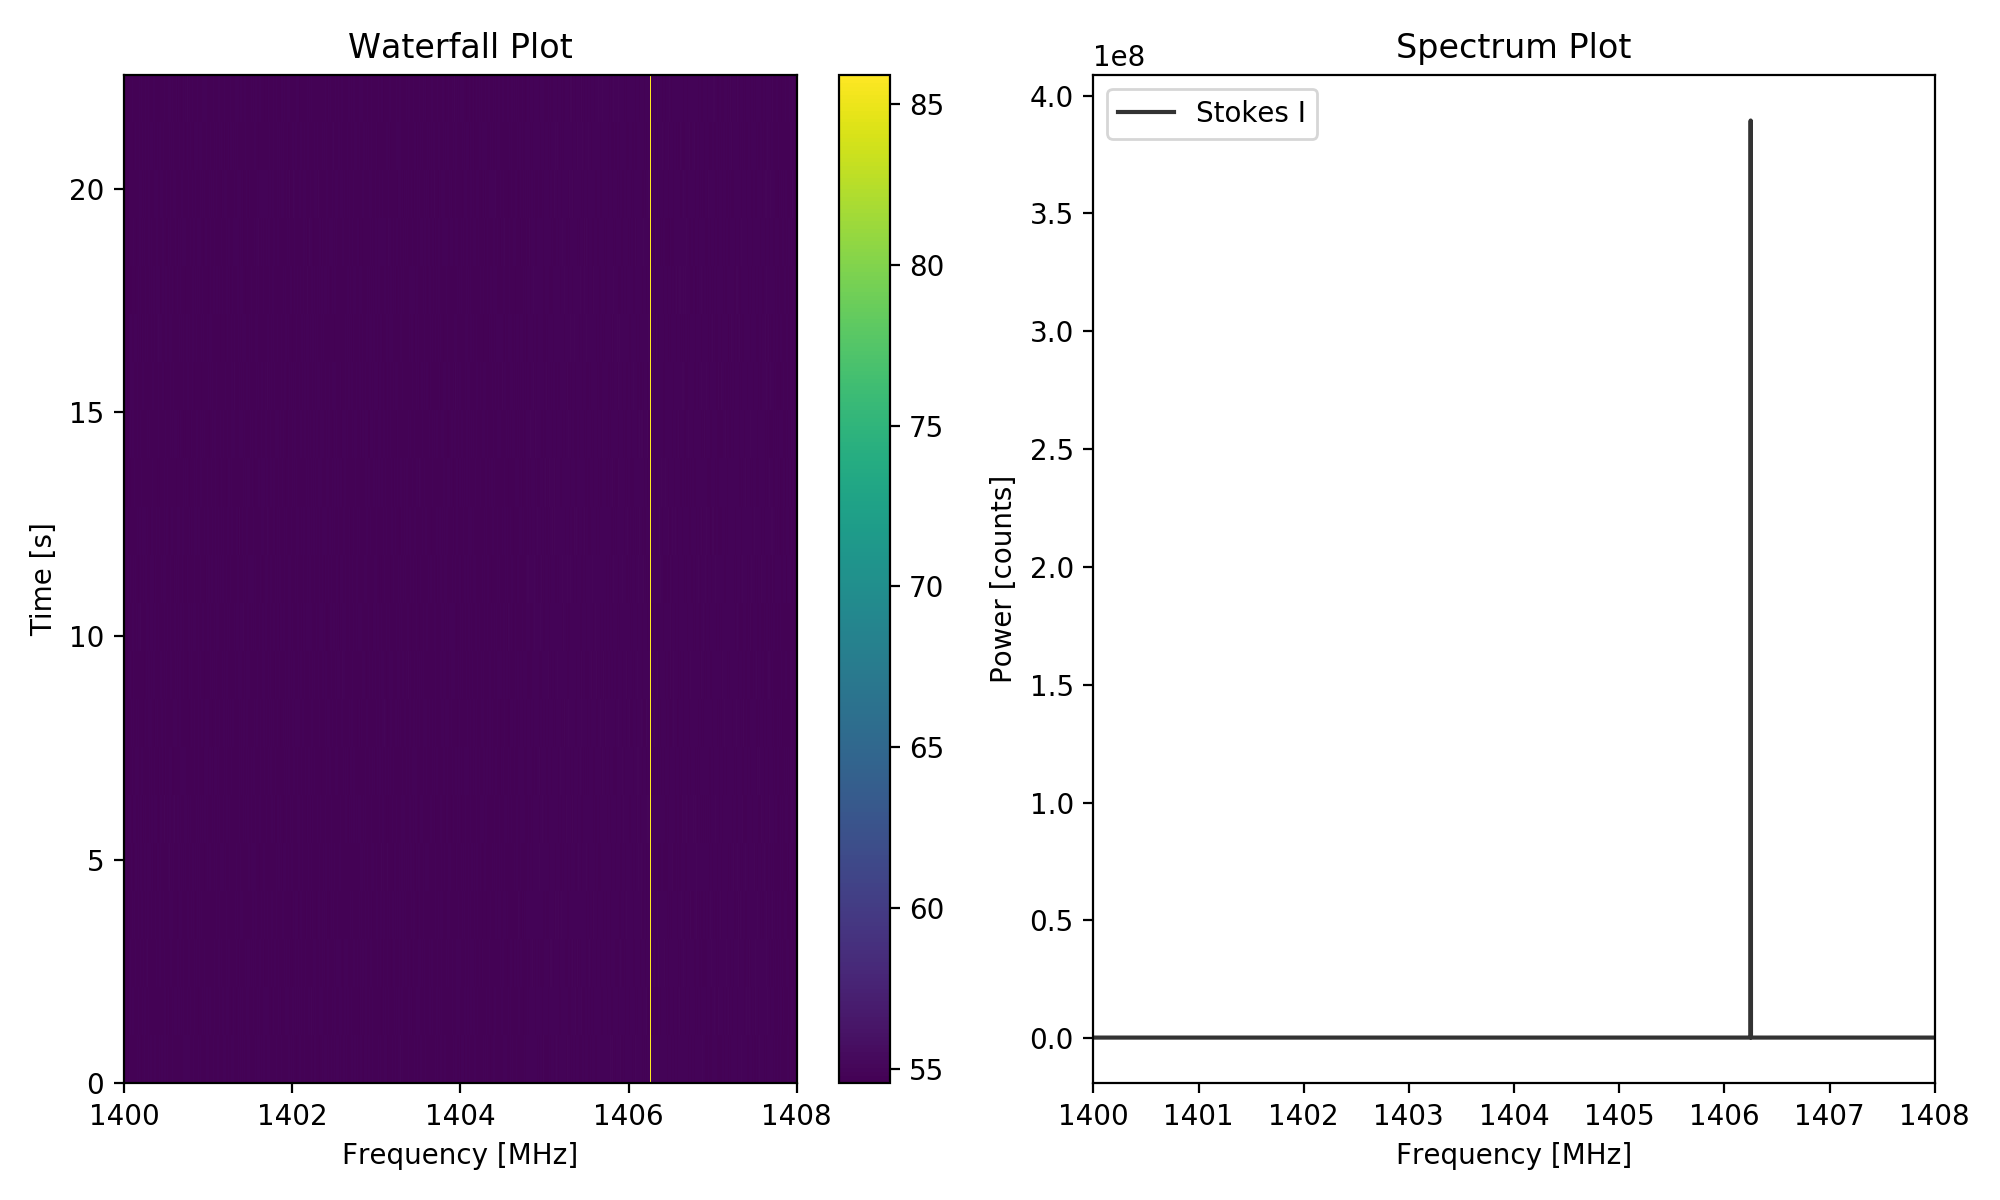

averaging along time axis...


In [19]:
zoom_start_f = 1400
zoom_stop_f = 1408
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
obs_high_freq_res.plot_waterfall(f_start=zoom_start_f, f_stop=zoom_stop_f)
title = plt.title(
    "Waterfall Plot")

plt.subplot(1,2,2)
obs_high_freq_res.plot_spectrum(t=b'all',f_start=zoom_start_f, f_stop=zoom_stop_f)
title = plt.title("Spectrum Plot")

plt.tight_layout()

In [ ]:
freqs_h, data_h = obs_high_freq_res.grab_data()

In [ ]:
len(freqs_h)

In [ ]:
np.mean(data_h)

In [ ]:
samp = generate_2d_normal(8*64*1024)
samp.shape

In [ ]:
np.mean(samp[0]**2+samp[1]**2)

In [ ]:
ch = np.reshape(samp[0] + samp[1]*1j, (8, 64*1024))
ch.shape

In [ ]:
spectra = np.fft.fft(ch.T, axis=1)
spectra

In [ ]:
rawspec = np.sum(np.abs(spectra)**2, axis=0)
rawspec

In [ ]:
np.mean(np.abs(rawspec/(64*1024)))/8